In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split 
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Insurance Dataset.csv")
data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [5]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1=data.copy()

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [7]:
data1.shape

(1048575, 24)

In [8]:
data1.isna().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [9]:
data1["Area_Service"].fillna('Hudson Valley',inplace=True) # data['Area_Service'].mode() = Hudson Valley
data1["Hospital Id"].fillna(413.0,inplace=True) # data['Hospital Id'].mode() = 413.0
data1["Hospital County"].fillna('Erie',inplace=True) # data['Hospital County'].mode() = Erie
data1["Mortality risk"].fillna(1.0,inplace=True) # data['Mortality risk'].mode() = 1.0

In [10]:
data1.isna().sum() # it is clear that the data is cleaned

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [11]:
#Print the duplicated rows
data1[data1.duplicated()]

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,39.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3700,N,N,1678.75,737.21,0.439141,1,1
3086,Western NY,Cattaraugus,66.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3600,N,N,1251.50,829.70,0.662961,0,1
3226,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4209,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4234,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2800,N,N,1150.50,788.65,0.685486,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,1168.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2900,N,N,5955.85,1303.62,0.218881,1,3
1025529,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3
1028997,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,0,N,N,12557.00,2963.40,0.235996,1,2
1035973,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3


In [12]:
#Count of duplicated rows
data[data.duplicated()].shape

(4814, 24)

In [13]:
data_cleaned=data1.drop_duplicates()

In [14]:
data_cleaned.shape

(1043761, 24)

In [15]:
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hospital Id                                764.000000
ccs_diagnosis_code                         110.000000
ccs_procedure_code                         172.000000
Code_illness                                 2.000000
Mortality risk                               2.000000
Weight_baby                                  0.000000
Tot_charg                                21768.750000
Tot_cost                                  8115.200000
ratio_of_total_costs_to_total_charges        0.205405
Result                                       1.000000
Payment_Typology                             2.000000
dtype: float64


In [16]:
data_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) |(data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
len(data_cleaned['Days_spend_hsptl'].unique())

57

In [18]:
data_cleaned['Days_spend_hsptl'].unique()

array(['3', '1', '2', '14', '5', '4', '9', '8', '10', '6', '12', '7',
       '11', '13', '16', '15', '18', '23', '21', '22', '19', '24', '20',
       '17', '26', '58', '30', '27', '34', '70', '31', '25', '29', '32',
       '28', '33', '36', '37', '35', '120 +', '48', '60', '97', '50',
       '66', '64', '53', '56', '38', '41', '40', '46', '51', '44', '43',
       '39', '42'], dtype=object)

In [19]:
data_cleaned['Days_spend_hsptl'].replace(to_replace='120 +',value='121',inplace=True)

In [20]:
data_cleaned['Days_spend_hsptl']=data_cleaned['Days_spend_hsptl'].astype('int64')

In [21]:
data_cleaned['Days_spend_hsptl'].unique()

array([  3,   1,   2,  14,   5,   4,   9,   8,  10,   6,  12,   7,  11,
        13,  16,  15,  18,  23,  21,  22,  19,  24,  20,  17,  26,  58,
        30,  27,  34,  70,  31,  25,  29,  32,  28,  33,  36,  37,  35,
       121,  48,  60,  97,  50,  66,  64,  53,  56,  38,  41,  40,  46,
        51,  44,  43,  39,  42])

In [22]:
labelencoder = LabelEncoder()
data_cleaned.iloc[:,0] = labelencoder.fit_transform(data_cleaned.iloc[:,0])
data_cleaned.iloc[:,1] = labelencoder.fit_transform(data_cleaned.iloc[:,1])
data_cleaned.iloc[:,3] = labelencoder.fit_transform(data_cleaned.iloc[:,3])
data_cleaned.iloc[:,4] = labelencoder.fit_transform(data_cleaned.iloc[:,4])
data_cleaned.iloc[:,5] = labelencoder.fit_transform(data_cleaned.iloc[:,5])
data_cleaned.iloc[:,6] = labelencoder.fit_transform(data_cleaned.iloc[:,6])
data_cleaned.iloc[:,8] = labelencoder.fit_transform(data_cleaned.iloc[:,8])
data_cleaned.iloc[:,9] = labelencoder.fit_transform(data_cleaned.iloc[:,9])
data_cleaned.iloc[:,12] = labelencoder.fit_transform(data_cleaned.iloc[:,12])
data_cleaned.iloc[:,15] = labelencoder.fit_transform(data_cleaned.iloc[:,15])
data_cleaned.iloc[:,17] = labelencoder.fit_transform(data_cleaned.iloc[:,17])
data_cleaned.iloc[:,18] = labelencoder.fit_transform(data_cleaned.iloc[:,18])

In [23]:
X=data_cleaned.drop(['Result'],axis=1)
Y= data_cleaned.Result 

In [24]:
from sklearn.tree import  DecisionTreeClassifier
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[1.43087897e-02 1.59763762e-02 3.85519436e-02 3.21488154e-02
 1.72981124e-02 1.82042203e-02 1.01252167e-02 4.16140583e-02
 1.40949578e-02 2.85234495e-02 6.64664074e-02 4.68287611e-02
 5.44947555e-02 2.87294947e-02 1.63267887e-02 3.45795634e-03
 0.00000000e+00 1.65158649e-05 7.92312397e-03 1.65603755e-01
 1.67770953e-01 1.85023308e-01 2.65122405e-02]


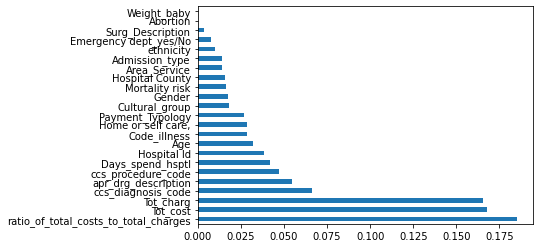

In [25]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [26]:
data_cleaned.drop(['Abortion','Surg_Description','Emergency dept_yes/No','ethnicity','Admission_type','Area_Service','Weight_baby','Hospital County','Gender','Cultural_group','Payment_Typology','Mortality risk'],inplace=True,axis=1)

In [27]:
X1 = data_cleaned.drop(['Result'],axis=1)
Y= data_cleaned.Result 

In [28]:
from imblearn.combine import SMOTETomek
smot = SMOTETomek(ratio="auto",random_state=42)
x_smot, y_smot = smot.fit_sample(X1,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [29]:
from collections import Counter
print(Counter(Y))
print(Counter(y_smot))

Counter({1: 525966, 0: 175146})
Counter({1: 500819, 0: 500819})


In [30]:
# splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smot,y_smot,test_size=0.3) 

In [31]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from xgboost import XGBClassifier

In [32]:
clf1 = DecisionTreeClassifier()
params1 = {'max_depth': range(6,11),
          'max_features': range(6,11),
          'criterion': ['gini','entropy']}
cv = StratifiedKFold(n_splits=3,random_state=42)  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [33]:
grid = GridSearchCV(clf1,params1,cv=cv,n_jobs=-1,scoring='accuracy',error_score=0)
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
             error_score=0,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
           

In [34]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

Best: 0.803003 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10}


In [35]:
model = DecisionTreeClassifier(criterion='gini',max_depth=14,max_features=9)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [37]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
pd.crosstab(y_test,y_pred)

[[ 95430  54678]
 [  1499 148885]]


col_0,0,1
row_0,,
0,95430,54678
1,1499,148885


In [38]:
train=round(model.score(x_train,y_train) * 100, 2)
train

81.77

In [39]:
test_acc=round(accuracy_score(y_test,y_pred)*100,2)
test_acc

81.3

In [40]:
Model3 = RandomForestClassifier(n_estimators=50,max_features=3,min_samples_leaf=3,min_samples_split=2,n_jobs=-1,verbose=2)
Model3.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.9s


building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [41]:
train1=round(Model3.score(x_train,y_train) * 100, 2)
train1

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    5.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    6.7s finished


93.02

In [42]:
y_pred2 = Model3.predict(x_test)
y_pred2

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    3.0s finished


array([0, 0, 1, ..., 0, 1, 0])

In [43]:
test1=round(accuracy_score(y_test,y_pred2)*100,2)
test1

83.09

In [44]:
clf2 = RandomForestClassifier()
n_estimators = [70]
max_features = [3]
min_samples_split = [2]
min_samples_leaf = [3]
max_depth = [10]

In [45]:
params2 = dict(n_estimators=n_estimators,max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
cv = StratifiedKFold(n_splits=3,random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [46]:
from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(estimator=clf2,param_grid=params2,scoring='accuracy',n_jobs=-1,error_score=0,verbose=2)
grid2.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


GridSearchCV(cv=None, error_score=0,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [47]:
print("Best: %f using %s" % (grid2.best_score_,grid2.best_params_))

Best: 0.805999 using {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 70}


In [48]:
clf2 = RandomForestClassifier(n_estimators=70,max_features=4,min_samples_leaf=5,min_samples_split=3,max_depth=16,n_jobs=-1,verbose=2)
clf2.fit(x_train,y_train) 

building tree 1 of 70
building tree 2 of 70


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 70
building tree 4 of 70
building tree 5 of 70
building tree 6 of 70
building tree 7 of 70
building tree 8 of 70
building tree 9 of 70
building tree 10 of 70
building tree 11 of 70
building tree 12 of 70
building tree 13 of 70
building tree 14 of 70
building tree 15 of 70
building tree 16 of 70
building tree 17 of 70
building tree 18 of 70
building tree 19 of 70
building tree 20 of 70
building tree 21 of 70
building tree 22 of 70
building tree 23 of 70
building tree 24 of 70
building tree 25 of 70
building tree 26 of 70
building tree 27 of 70
building tree 28 of 70
building tree 29 of 70
building tree 30 of 70
building tree 31 of 70
building tree 32 of 70
building tree 33 of 70
building tree 34 of 70
building tree 35 of 70
building tree 36 of 70
building tree 37 of 70
building tree 38 of 70


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   53.2s


building tree 39 of 70
building tree 40 of 70
building tree 41 of 70
building tree 42 of 70
building tree 43 of 70
building tree 44 of 70
building tree 45 of 70
building tree 46 of 70
building tree 47 of 70
building tree 48 of 70
building tree 49 of 70
building tree 50 of 70
building tree 51 of 70
building tree 52 of 70
building tree 53 of 70
building tree 54 of 70
building tree 55 of 70
building tree 56 of 70
building tree 57 of 70
building tree 58 of 70
building tree 59 of 70
building tree 60 of 70
building tree 61 of 70
building tree 62 of 70
building tree 63 of 70
building tree 64 of 70
building tree 65 of 70
building tree 66 of 70
building tree 67 of 70
building tree 68 of 70
building tree 69 of 70
building tree 70 of 70


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [49]:
y3_pred = clf2.predict(x_test)
y3_pred

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done  70 out of  70 | elapsed:    1.9s finished


array([0, 0, 1, ..., 0, 1, 0])

In [50]:
train3=round(clf2.score(x_train,y_train) * 100, 2)
train3 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done  70 out of  70 | elapsed:    4.4s finished


82.22

In [51]:
test3=round(accuracy_score(y_test,y3_pred)*100,2)
test3

82.16

In [52]:
from pickle import dump
from pickle import load
dump(clf2,open('FINAL_RF.sav', 'wb'))

In [54]:
loaded_model=load(open('FINAL_RF.sav' ,'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.0s


0.8215593093992519


[Parallel(n_jobs=2)]: Done  70 out of  70 | elapsed:    1.9s finished
